
Run controls set



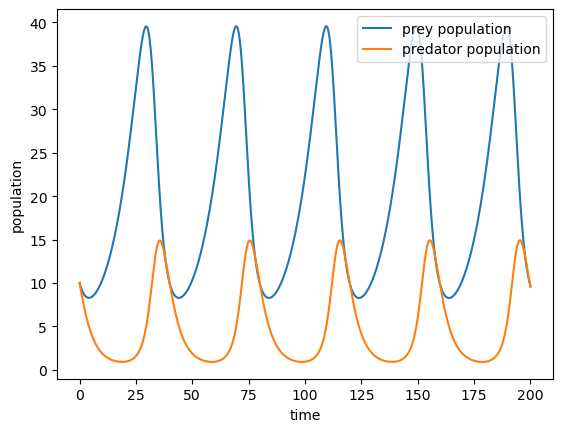

In [1]:
###Sys block
import warnings
warnings.simplefilter(action = 'ignore')

###Lib block
import numpy as np
import sys
import pandas as pd
from matplotlib import pyplot as plt

###Fxn block
def mod(alpha, beta, delta, gamma, time, dt, prey0, pred0):
	'''
	Lokta-Voltera model construction:
		-alpha = reproduction rate of prey
		-beta = mortality rate of prey
		-delta = reproduction rate of predator
		-gamma = mortality rate of predators
	'''

	#Modl params
	alpha = alpha
	beta = beta
	delta = delta
	gamma = gamma

	#Run controls
	time = time #arbitrary
	dt = dt
	n = time/dt
	t = np.arange(0 + dt, time, dt) #0 + dt to account for initialization

	#Anti-bug run controls
	if len(t) == (n - 1):
		print('\nRun controls set\n')

	else:
		print('\nRun control exception\n')
		sys.exit(1)


	#DAQ vectors
	x = []
	y = []

	#Initialization
	x.append(prey0)
	y.append(pred0)

	#Nested helper fxns
	def dxdt(x, y, alpha, beta):
		return(alpha*x - beta*x*y)

	def dydt(x, y, delta, gamma):
		return(delta*x*y - gamma*y)

	#Integrate using forward-Euler formalism
	for i,_ in enumerate(t):
		x.append(x[i] + dt*dxdt(x[i], y[i], alpha, beta))
		y.append(y[i] + dt*dydt(x[i], y[i], delta, gamma))

	#Package vectors in 2d heterogenous df
	data = pd.DataFrame({'t': np.insert(t, 0, 0),
						 'x': x,
						 'y': y})

	#Fxn I/O
	return(data)

def dataViz(df):
	'''
	Simple visualizer
	'''

	#Vizualize
	plt.figure()
	plt.plot(df['t'], df['x'],
			 label = 'prey population')
	plt.plot(df['t'], df['y'],
			 label = 'predator population')
	plt.xlabel('time')
	plt.ylabel('population')
	plt.legend(loc = 'upper right')
	plt.show()

def main(sim, viz):
	#Boolean flag for simulation
	if sim:
		#Simulation model; capture as object
		modl = mod(alpha = 0.1, 
				   beta = 0.02,
				   delta = 0.015,  
				   gamma = 0.3,
				   time = 200, 
				   dt = 0.001, 
				   prey0 = 10, 
				   pred0 = 10)

	#Boolean flag for visualization
	if viz:
		#Visualize
		dataViz(df = modl)

###Main block
main(sim = True,
	 viz = True)
